<a href="https://colab.research.google.com/github/mukul-mschauhan/textanalytics/blob/master/airline_sentiment2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Airline Sentiment Analysis

* We are more focused on finding the negative sentiment.

* Which metric (Accuracy, Precision, Recall) would be most important here?


In [ ]:
# Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_csv("/content/data.csv")

In [ ]:
airline.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Create a new panda DataFrame by fetching two columns 'text’ and
'airline_sentiment' from data.csv. Use this new DataFrame for further processing
as questioned below. Treat The 'text' column as feature column and
'airline_sentiment’ as target column.

In [ ]:
localdf = airline.loc[:, ["text", "airline_sentiment"]]

localdf.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Clean the 'text' columns as questioned below.
* i. Convert all text to lower case. (Marks- 4)
* ii. Remove the URLs (http & www) from text. (Marks-6)
* iii. Remove stopwords from text. (Marks-8)
* iv. Remove punctuations from text. (Marks-8)

In [ ]:
import re
def clean_text(text):
    text = text.lower() # convert to lower case
    text = re.sub("(www.+)|(\s+)|(@[a-zA-Z]+)|\W+", " ", text) # removes hyperlinks, special chars
    text = re.sub('(\w+:/\S+)', " ", text) # removes hyperlinks
    text = re.sub(r'<-*?>', '', text) # remove html tags
    text = re.sub(r'\s+', ' ', text).strip() # removal of extra space
    text = re.sub("http|https", " ", text) # remove http links
    text = re.sub("[^a-zA-Z]+", " ", text) # remove special chars
    return(text)

In [ ]:
localdf["new_text"] = localdf["text"].apply(clean_text)

## Remove Stopwords

In [ ]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords
stop = stopwords.words("english")

def remove_stopwords(text):
  words = text.split()
  words = [word for word in words if word not in stop]
  return " ".join(words)

localdf["new_text"] = localdf["new_text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Punctuation

In [ ]:
import string
noise = string.punctuation

# Lower the Case & Punctuation Removal
def remove_stops(text):
  words = text.split()
  cleansed = [word for word in words if word not in noise]
  return " ".join(cleansed)

localdf["new_text"] = localdf["new_text"].apply(remove_stops)

### Fetch the top six most frequently used words from the text corpus.

* Step1: Tokenize the text and create a collection of all the tokens from the entire text

* Step2: Calculate the Frequency of each token & Visualize it.

#### Generate a Word Cloud

In [ ]:
# Tokenize the Text

nltk.download("punkt")
from nltk.tokenize import word_tokenize

# Generate the List...
all_tokens  = [tokens for text in localdf.new_text for tokens in word_tokenize(text)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


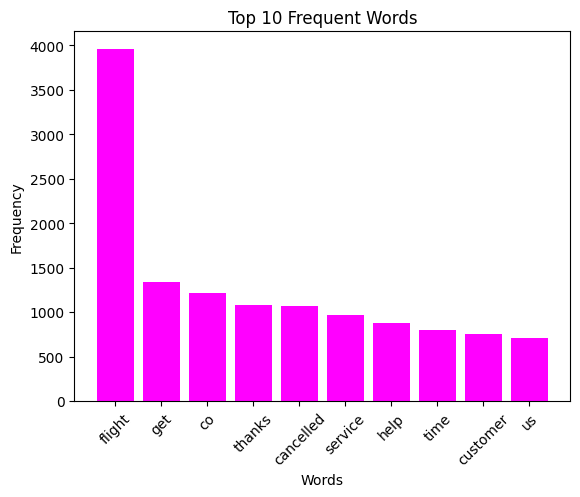

In [ ]:
# Generate the Frequency of each word & find the Top 6 Words Emerging in this Airline Dataset
from nltk.probability import FreqDist

freq_dist = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["text", "freq"]).sort_values(by = "freq",
                                                                                   ascending = False)


plt.bar(freq_dist.text[0:10], freq_dist.freq[0:10], color = "magenta")
plt.title("Top 10 Frequent Words")
plt.xlabel("Words")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.show()

### Word Cloud

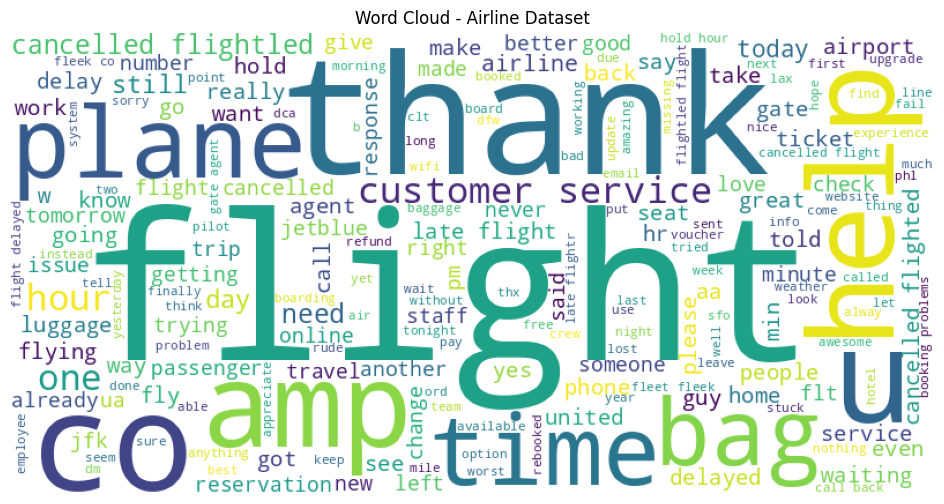

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud

# Generate word cloud using all_tokens

wordcloud = WordCloud(width = 800, height = 400,
                      background_color = "white").generate(" ".join(all_tokens))

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.title("Word Cloud - Airline Dataset")
plt.axis("off")
plt.show()

### Convert the cleaned text- column into numerical using Count-vectorization.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(stop_words = "english", min_df = 5)
# Fit and Transform
X_cv = cv.fit_transform(localdf.new_text).toarray()

# Feature Names
names = cv.get_feature_names_out()

print(X.shape)
print(len(names))

(14640, 12897)
2642


### Convert the cleaned text -column into numerical using TF-IDF.

In [ ]:
# tf-idf
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(localdf.new_text).toarray()

Split both Count-Vectorirzed and TF-ID dataset into train & test set with one
fourth records being held for testing also ensure stratified sampling of target i.e.,
airline_sentiment on both splits.

In [ ]:
localdf.airline_sentiment.value_counts()

def target(x):
  if x=="negative":
    return(-1)
  elif x=="positive":
    return(1)
  else:
    return(0)

localdf["target"] = localdf.airline_sentiment.apply(target)

In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

# Train test split basis Count Vectorizer Data
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv,
                                                                localdf.target,
                                                                test_size = 0.25,
                                                                random_state = 42,
                                                                stratify = localdf.target)


# Train test split basis Count Vectorizer Data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf,
                                                                localdf.target,
                                                                test_size = 0.25,
                                                                random_state = 42,
                                                                stratify = localdf.target)



### Build a basic logistic regression model on Count-vectorize train set. Find out its accuracy on Count-vectorize test set. (5+5)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and Train the Model

logreg = LogisticRegression(solver='liblinear')
pred = logreg.fit(X_train_cv, y_train_cv).predict(X_test_cv)

# Classification Report...

print(classification_report(y_test_cv, pred))

              precision    recall  f1-score   support

          -1       0.83      0.90      0.86      2294
           0       0.62      0.53      0.57       775
           1       0.75      0.66      0.70       591

    accuracy                           0.78      3660
   macro avg       0.73      0.70      0.71      3660
weighted avg       0.77      0.78      0.78      3660



In [56]:
# Tfidf Data Model
# Create and Train the Model

logreg = LogisticRegression(solver='liblinear')
pred = logreg.fit(X_train_tf, y_train_tf).predict(X_test_tf)

# Classification Report...

print(classification_report(y_test_tf, pred))

              precision    recall  f1-score   support

          -1       0.77      0.96      0.85      2294
           0       0.68      0.37      0.48       775
           1       0.85      0.53      0.66       591

    accuracy                           0.76      3660
   macro avg       0.76      0.62      0.66      3660
weighted avg       0.76      0.76      0.74      3660

